In [211]:
# importing dependencies
import pandas as pd
import numpy
from pandas import DataFrame
import csv
import matplotlib.pyplot as plt
import numpy as np

In [212]:
# reading in the csv file
original = pd.read_csv('gun-violence-data.csv')

In [213]:
# displaying the dataframe
original.head(0)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district


In [214]:
# dropping unnecessary columns
df = original.drop(['incident_url','source_url',
                    'incident_url_fields_missing',
                    'sources','address'], axis = 1)
df.head(0)

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district


####   The next 12 lines of code are counting the instances of specific text and placing those values in new columns.  The 
####   original data had multiple values per incident in one column.  For instance: if an incident included three participants, the 
####   column for participant_age_group would include 0::Adult 18+||1::Adult 18+||2::Adult 18+.  Instead, there will be a 3 under 
####   the column 'adults' .

In [215]:
df['gun stolen'] = df['gun_stolen'].str.count('Stolen')

In [216]:
df['gun not stolen'] = df['gun_stolen'].str.count('Not-stolen')

In [217]:
df['female participants'] = df['participant_gender'].str.count('Female')

In [218]:
df['male participants'] = df['participant_gender'].str.count('Male')

In [219]:
df['arrested'] = df['participant_status'].str.count('Arrested')

In [220]:
df['unharmed'] = df['participant_status'].str.count('Unharmed')

In [221]:
df['unharmed/arrested'] = df['participant_status'].str.count('Unharmed, Arrested')

In [222]:
df['victims'] = df['participant_type'].str.count('Victim')

In [223]:
df['subject/suspect'] = df['participant_type'].str.count('Subject-Suspect')

In [224]:
df['children'] = df['participant_age_group'].str.count('Child 0-11')

In [225]:
df['teens'] = df['participant_age_group'].str.count('Teen 12-17')

In [226]:
df['adults'] = df['participant_age_group'].str.count('Adult 18+')
df.head(0)

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,...,female participants,male participants,arrested,unharmed,unharmed/arrested,victims,subject/suspect,children,teens,adults


In [227]:
# replacing NaN values with a blank
replaced_na = df.fillna('')

In [228]:
# dropping additional unnecessary columns and the columns where data was split out into new columns
cleaned_df = replaced_na.drop(['participant_age','participant_age_group',
                               'participant_gender','participant_name','participant_relationship',
                              'participant_status','participant_type','gun_stolen','notes'], axis = 1)

In [229]:
cleaned_df.head(0)

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_type,incident_characteristics,latitude,...,female participants,male participants,arrested,unharmed,unharmed/arrested,victims,subject/suspect,children,teens,adults


In [230]:
# exporting the cleaned data to .csv
# cleaned_df.to_csv('CleanedGunViolenceData.csv', index=False)

In [231]:
# converting date column to datetime format
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])

In [232]:
# displaying the number of blank rows
c = (cleaned_df['victims'] == '').sum()
print(c)    

24863


In [233]:
# filtering - Removing 2013 and 2018 values and removing incidents in which there were no victims
filtered_df = cleaned_df[(cleaned_df['date'] > '2013-12-31') & (cleaned_df['date'] < '2018-01-01') 
                         & (cleaned_df['victims'] != "")& (cleaned_df['victims']!= 0)]

In [234]:
filtered_df.head(0)

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,gun_type,incident_characteristics,latitude,...,female participants,male participants,arrested,unharmed,unharmed/arrested,victims,subject/suspect,children,teens,adults


In [235]:
# creating new dataframe and converting victims column to list
df = pd.DataFrame(filtered_df)
victims = df['victims'].tolist()

In [236]:
# creating new dataframe using victims list as the column and date as the index 
data = pd.DataFrame({'value' : victims}, index=pd.DatetimeIndex(df['date']))

In [237]:
data.head()

,value
date,
2014-01-01,1.0
2014-01-01,1.0
2014-01-01,1.0
2014-01-01,1.0
2014-01-01,1.0


In [238]:
# converting the value column to numpy integer
data['value'] = data['value'].astype(np.int64)

In [239]:
# confirming data conversion
data.dtypes

value    int64
dtype: object

In [240]:
# creating a pivot table to sum number of victims by month 
pv = pd.pivot_table(data, index=data.index.month, columns=data.index.year,
                    values='value', aggfunc='sum')

In [241]:
# creating dataframe from pivot table
pv = pd.DataFrame(pv)
pv

date,2014,2015,2016,2017
date,,,,
1,4010,3040,3616,3864
2,2803,2297,2942,3124
3,3495,3295,3721,3262
4,3546,3371,3610,3696
5,4317,4086,3973,3910
6,4375,3751,3874,3828
7,5274,4148,4407,4219
8,5318,4144,4499,3845
9,4935,3841,3963,3616


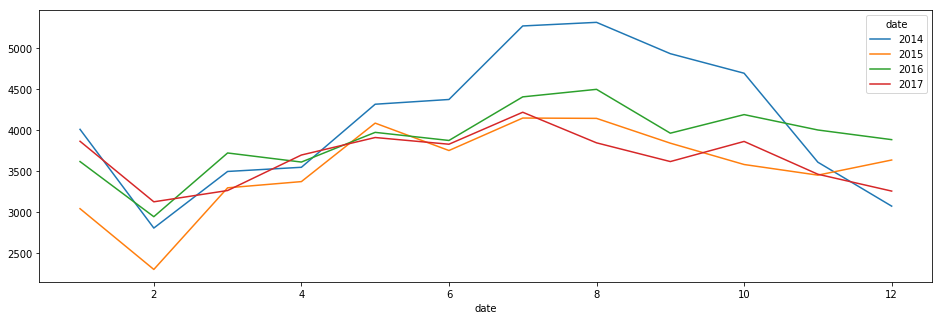

In [242]:
# plotting the pivot table data
from matplotlib.pyplot import figure
pv.plot(figsize=(16,5))

In [243]:
# # converting date column in df dataframe to datetime
# df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')

In [244]:
# creating a new dataframe where victims are summed by day of incident
new_df = data.resample('D').apply({'value':'sum'})
new_df

,value
date,
2014-01-01,220
2014-01-02,103
2014-01-03,119
2014-01-04,146
2014-01-05,127
2014-01-06,109
2014-01-07,78
2014-01-08,118
2014-01-09,128


In [245]:
# importing dependencies
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [246]:
#creating train and test sets
data = new_df.values

train = data[0:1096,:]
test = data[1096:,:]

In [247]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

x_train, y_train = [], []
for i in range(90,len(train)):
    x_train.append(scaled_data[i-90:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

C:\Users\kmcle\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [248]:
# create model and add layers
deep_model = Sequential()
deep_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
deep_model.add(LSTM(units=50))
deep_model.add(Dense(1))

In [249]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 90, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [250]:
# compile and fit model
deep_model.compile(optimizer='adam', 
                   loss='mean_squared_error', 
                   metrics = ['accuracy'])

deep_model.fit(x_train, 
               y_train, 
               epochs=14, 
               batch_size=1, 
               verbose=2
              )

Epoch 1/14
 - 48s - loss: 0.0147 - acc: 0.0020
Epoch 2/14
 - 47s - loss: 0.0126 - acc: 0.0020
Epoch 3/14
 - 46s - loss: 0.0119 - acc: 0.0020
Epoch 4/14
 - 46s - loss: 0.0098 - acc: 0.0030
Epoch 5/14
 - 46s - loss: 0.0092 - acc: 0.0020
Epoch 6/14
 - 46s - loss: 0.0095 - acc: 0.0020
Epoch 7/14
 - 46s - loss: 0.0093 - acc: 0.0020
Epoch 8/14
 - 46s - loss: 0.0086 - acc: 0.0030
Epoch 9/14
 - 47s - loss: 0.0086 - acc: 0.0030
Epoch 10/14
 - 46s - loss: 0.0083 - acc: 0.0020
Epoch 11/14
 - 46s - loss: 0.0079 - acc: 0.0030
Epoch 12/14
 - 46s - loss: 0.0080 - acc: 0.0020
Epoch 13/14
 - 46s - loss: 0.0077 - acc: 0.0030
Epoch 14/14
 - 46s - loss: 0.0076 - acc: 0.0030


In [251]:
#predicting 365 values, using past 90 from the train data
inputs = new_df[1461-455:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [252]:
inputs.shape

(455, 1)

In [253]:
X_test = []
for i in range(90,inputs.shape[0]):
    X_test.append(inputs[i-90:i,0])
X_test = np.array(X_test)

In [254]:
X_test.shape

(365, 90)

In [255]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_victims = deep_model.predict(X_test)
predicted_victims = scaler.inverse_transform(predicted_victims)

In [256]:
rms=np.sqrt(np.mean(np.power((test-predicted_victims),2)))
rms

21.87284648661499

C:\Users\kmcle\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


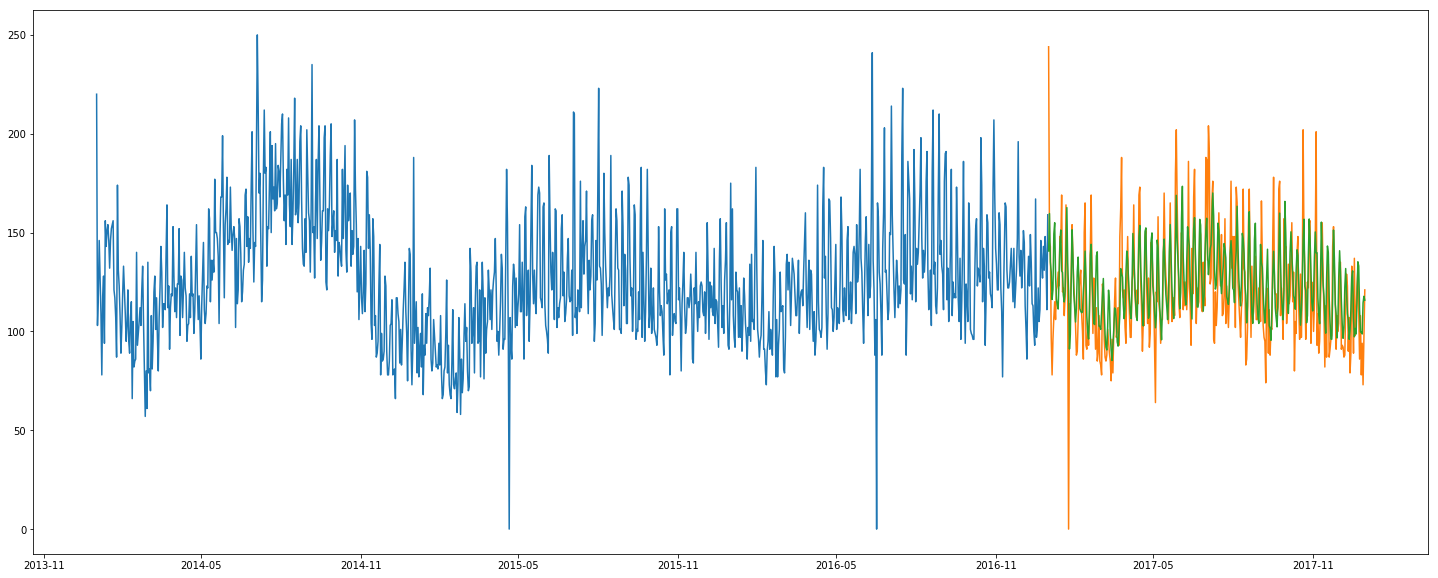

In [257]:
#plotting train, test and prediction values
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
from matplotlib.pyplot import figure
train = new_df[:1096]
test = new_df[1096:]
test['Predictions'] = predicted_victims


plt.plot(train['value'])
plt.plot(test[['value','Predictions']])

In [258]:
test.head()

,value,Predictions
date,,
2017-01-01,244,140.670303
2017-01-02,145,159.651947
2017-01-03,143,135.154190
2017-01-04,97,130.090988
2017-01-05,78,116.140411


In [259]:
# create dataframe from test 
predicted_df = pd.DataFrame(test)

In [260]:
# resetting the index
predicted_df = predicted_df.reset_index()

In [261]:
predicted_df.dtypes

date           datetime64[ns]
value                   int64
Predictions           float32
dtype: object

In [262]:
# renaming the Predictions column to 2017 Predicted
predicted_df.rename(columns={'Predictions':'2017 Predicted'}, inplace=True)

In [263]:
predicted_df.dtypes

date              datetime64[ns]
value                      int64
2017 Predicted           float32
dtype: object

In [264]:
# converting the 2017 Predicted from float32 to int64
predicted_df['2017 Predicted'] = predicted_df['2017 Predicted'].astype(np.int64)

In [265]:
predicted_df.head()

,date,value,2017 Predicted
0,2017-01-01,244,140
1,2017-01-02,145,159
2,2017-01-03,143,135
3,2017-01-04,97,130
4,2017-01-05,78,116


In [268]:
# setting the date column as the index
predicted_df = predicted_df.set_index(pd.DatetimeIndex(predicted_df['date']))

In [269]:
# creating a pivot table summing the 'value' column by month
df1 = pd.pivot_table(predicted_df, index=predicted_df.index.month, columns=predicted_df.index.year,
                    values = 'value' , aggfunc='sum')

In [270]:
# creating a pivot table summing the '2017 Predicted' column by month
df2 = pd.pivot_table(predicted_df, index=predicted_df.index.month, columns=predicted_df.index.year,
                    values = '2017 Predicted' , aggfunc='sum')

In [272]:
# combining the first pivot table created from the original dataset with the pivot table showing the predicted 2017 victims
df3 = pd.concat((pv, df2), axis=1)
df3

date,2014,2015,2016,2017,2017
date,,,,,
1,4010,3040,3616,3864,3997
2,2803,2297,2942,3124,3310
3,3495,3295,3721,3262,3313
4,3546,3371,3610,3696,3792
5,4317,4086,3973,3910,3861
6,4375,3751,3874,3828,3961
7,5274,4148,4407,4219,4245
8,5318,4144,4499,3845,3940
9,4935,3841,3963,3616,3654


In [271]:
# combining the actual 2017 victims pivot table with 2017 predicted victims pivot table
df4 = pd.concat((df1, df2), axis = 1)
df4

date,2017,2017
date,,
1,3864,3997
2,3124,3310
3,3262,3313
4,3696,3792
5,3910,3861
6,3828,3961
7,4219,4245
8,3845,3940
9,3616,3654


In [273]:
# converting the df3 pivot table to a dataframe for plotting
df3 = pd.DataFrame(df3)

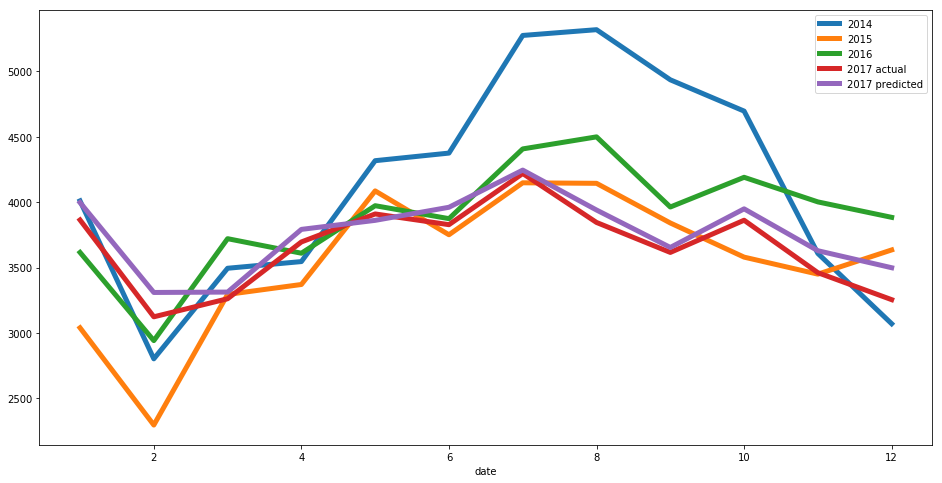

In [274]:
# plotting all years with predicted year
from matplotlib.pyplot import *
fig, ax = subplots()
df3.plot(kind='line', ax=ax,figsize=(16,8),linewidth=5)
ax.legend(['2014','2015','2016','2017 actual','2017 predicted',])

In [275]:
# converting the df4 pivot table to a dataframe for plotting
df4 = pd.DataFrame(df4)

C:\Users\kmcle\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


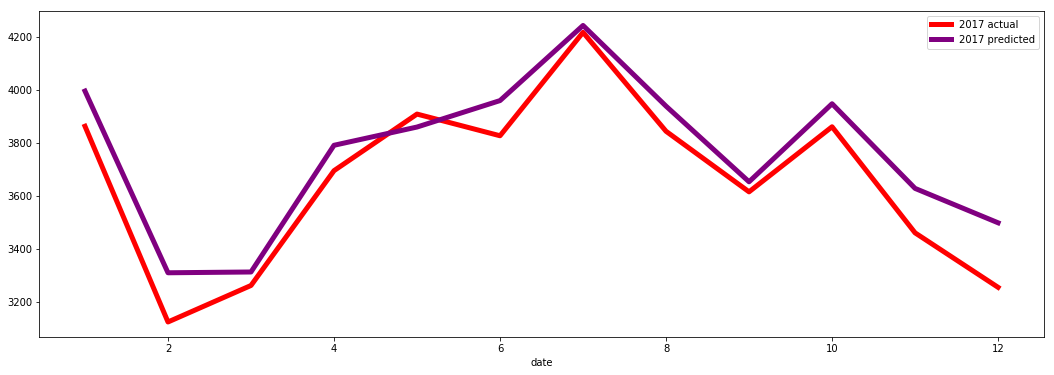

In [276]:
# plotting actual vs predicted 2017 gun violence victims
from matplotlib.pyplot import *
fig, ax = subplots()
ax.set_color_cycle(['red', 'purple'])
df4.plot(kind='line', ax=ax,figsize=(18,6),linewidth=5,)
ax.legend(['2017 actual','2017 predicted',])